In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('blinkit_data.csv')

In [5]:
df.shape

(8523, 12)

In [7]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [8]:
df.describe

<bound method NDFrame.describe of      Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018

In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [10]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [11]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [15]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [16]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})

In [18]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [36]:
Total_Sale = df['Sales'].sum()
print(f"Total_Sale: ${Total_Sale:,.1f}")

Total_Sale: $1,201,681.5


In [45]:
Avg_Sale = df['Sales'].mean()
print(f"Average sale is: ${Avg_Sale:,.1f}")

Average sale is: $141.0


In [38]:
Total_Items = df['Item Identifier'].count()
print("Total Number of Items is:" ,Total_Items)

Total Number of Items is: 8523


In [43]:
Avg_Rating = df['Rating'].mean()
print(f"Average Rating: {Avg_Rating:,.1f}")

Average Rating: 4.0


# Chart's Requirements

### 1.) Total Sales By Fat Content

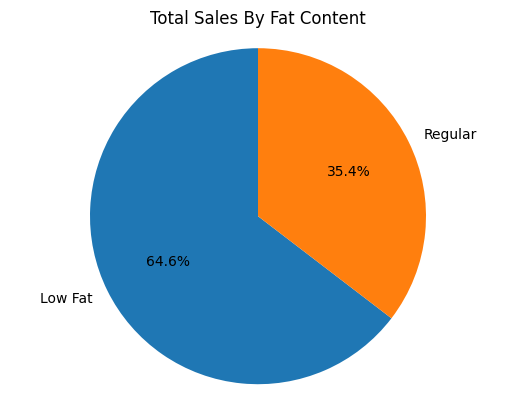

In [47]:
Sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(Sales_by_fat, labels = Sales_by_fat.index,
        autopct = '%.1f%%',
        startangle = 90)
plt.title("Total Sales By Fat Content")
plt.axis("equal")
plt.show()

### 2.) Total sales by Item type

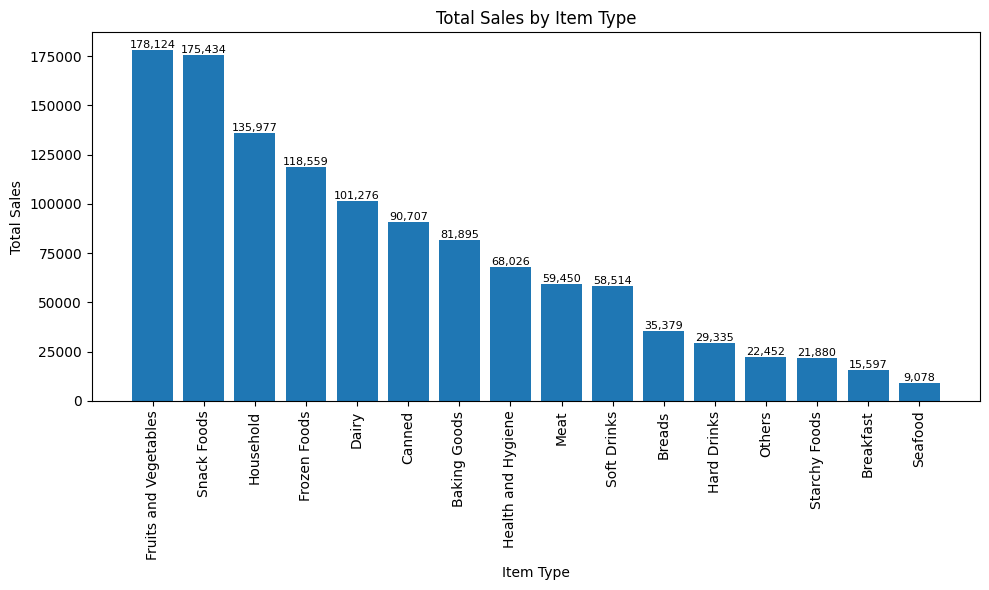

In [51]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

# Labels and title
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

# Adding value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x position (center of bar)
        bar.get_height(),                 # y position (height of bar)
        f'{bar.get_height():,.0f}',       # formatted value
        ha='center', va='bottom', fontsize=8
    )

plt.tight_layout()
plt.show()

### 3.) Total sale by fat content and Outlet

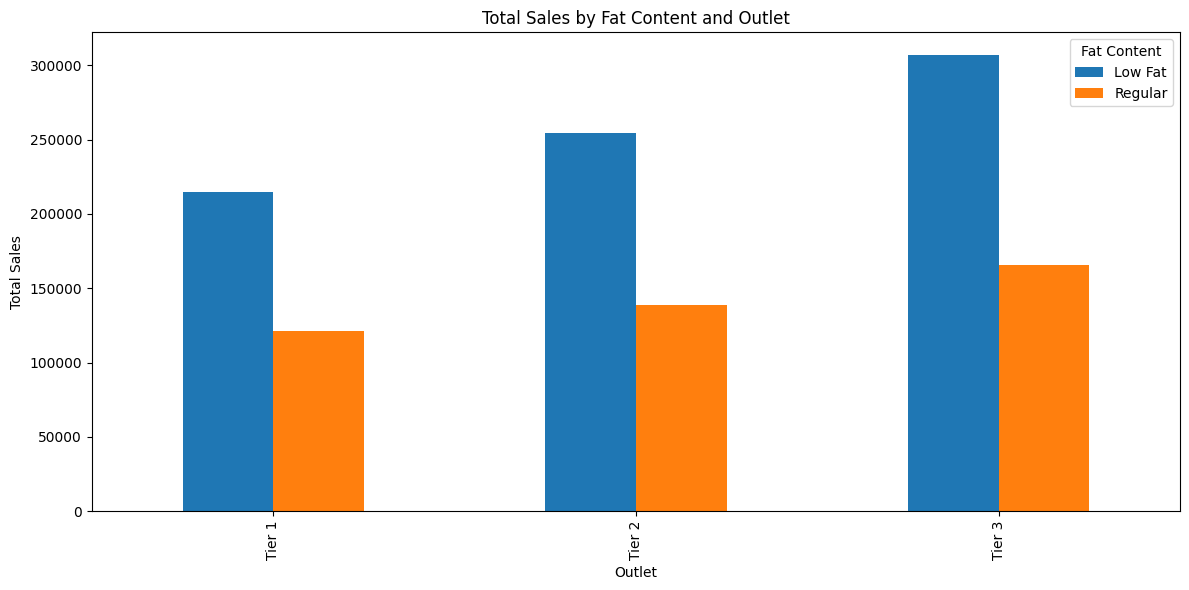

In [56]:
# Group by Outlet and Fat Content
sales_by_fat_outlet = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Plot grouped bar chart
sales_by_fat_outlet.plot(kind='bar', figsize=(12,6))

plt.xlabel('Outlet')
plt.ylabel('Total Sales')
plt.title('Total Sales by Fat Content and Outlet')
plt.xticks(rotation=90)
plt.legend(title='Fat Content')
plt.tight_layout()
plt.show()


### 4.) Total Sales by Outlet Establishment

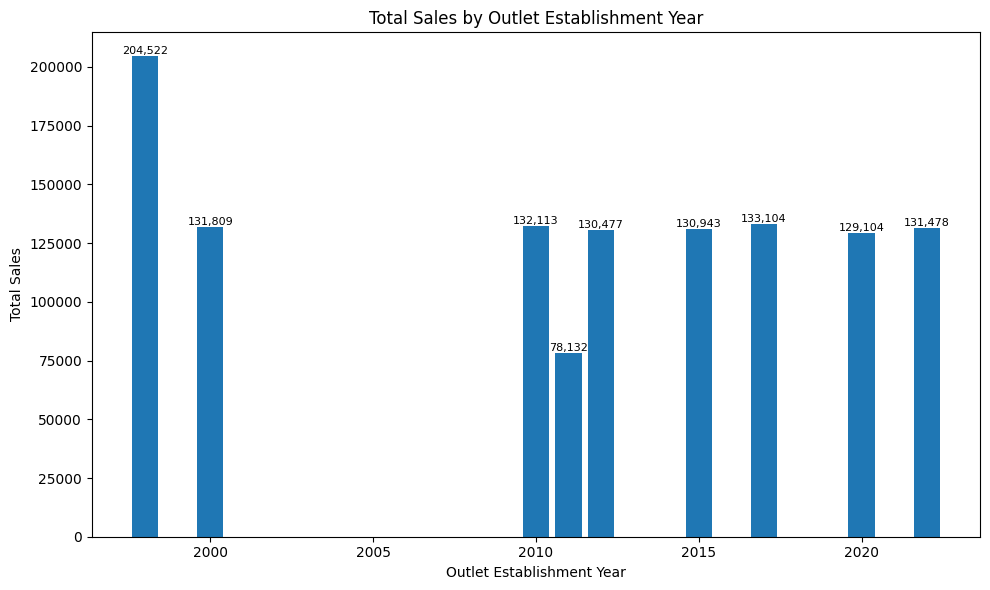

In [57]:
# Group by Establishment Year
sales_by_establishment = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_establishment.index, sales_by_establishment.values)

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Add value labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=8
    )

plt.tight_layout()
plt.show()

### 5.) Sales By Outlet Size  

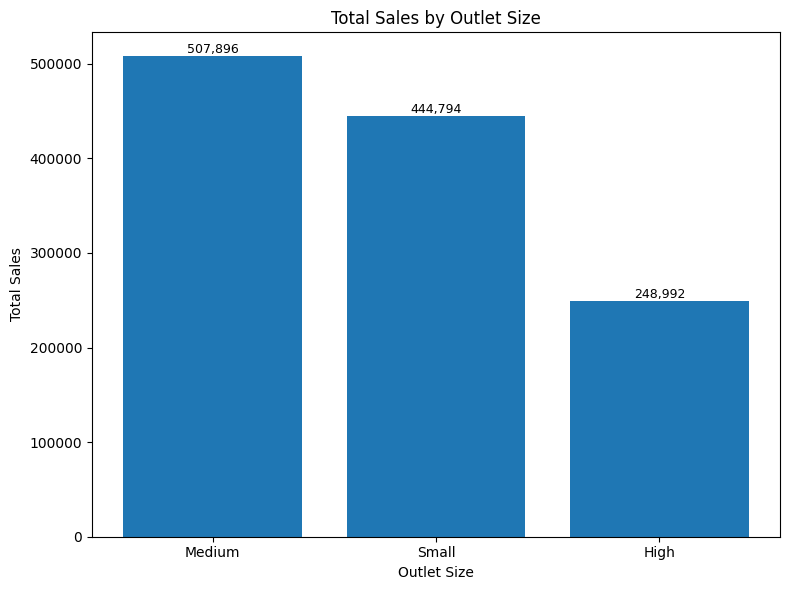

In [60]:
# Group by Outlet Size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
bars = plt.bar(sales_by_size.index, sales_by_size.values)

plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Size')

# Add value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,  # center of bar
        bar.get_height(),                 # height of bar
        f'{bar.get_height():,.0f}',       # formatted sales
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()

### 6.) Sales by outlet location

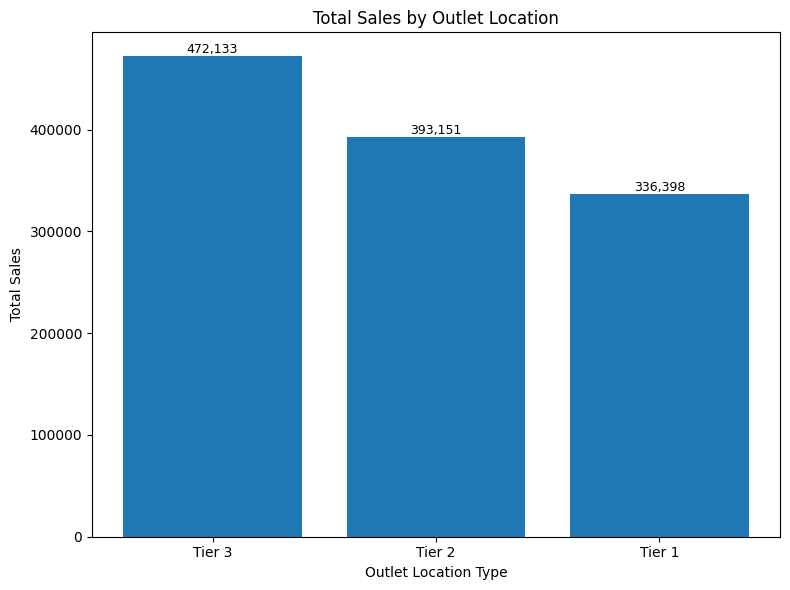

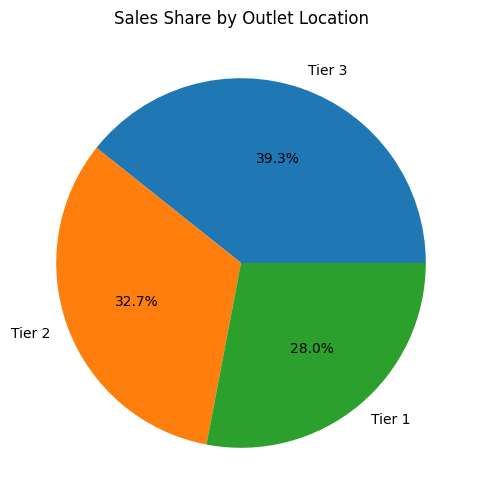

In [62]:
# Group by Outlet Location Type
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
bars = plt.bar(sales_by_location.index, sales_by_location.values)

plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Location')

# Add value labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        f'{bar.get_height():,.0f}', 
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()

sales_by_location.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(6,6), 
    ylabel='', 
    title='Sales Share by Outlet Location'
)
plt.show()
